## **IMPLEMENTING BACK-PROPOGATION ALGORITHM**

In [1]:
import random
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### **LOADING THE DATASET**

In [2]:
df = datasets.load_iris()

In [3]:
X = df['data']
print(X.shape)

(150, 4)


In [4]:
df_Y = df['target']
print(df_Y.shape)

(150,)


In [5]:
Y = pd.get_dummies(df_Y).values

### **NECESSARY CONSTANTS**

In [6]:
alpha = 1
epochs = list(range(1,201))

In [7]:
v = np.random.normal(size=(4,2))
print(v)

[[ 0.31334793  0.95811637]
 [-0.34070983  0.39312461]
 [ 0.14318899 -0.90416379]
 [-0.15282477 -2.89933318]]


In [8]:
w = np.random.normal(size=(2,3))
print(w)

[[-1.34073525 -0.30978762  1.63030853]
 [ 0.1697412   0.65337362 -0.63308074]]


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=50)

### **NECESSARY FUNCTIONS**

In [10]:
def activation(x):
    y = 1 / (1 + np.exp(-x))
    return y

In [11]:
def error(y, y_hat):
    err = np.array((y-y_hat)**2)
    err = err.mean()
    
    return err

In [12]:
def accuracy(y, y_hat):
    acc = 0
    acc += np.argmax(y, axis=1) == np.argmax(y_hat, axis=1)
    # print(acc)
    return acc.mean()

### **TRAINING FOR EPOCHS**

In [13]:
training_acc = []
training_err = []
v = np.random.normal(size=(4,2))
w = np.random.normal(size=(2,3))
best = [0, None, None]
last = 0
for _ in epochs:
    z_in = np.dot(X_train, v)

    z = []
    for zs in z_in:
        temp = []
        for i in zs:
            temp.append(activation(i))
        temp = np.array(temp)
        z.append(temp)

    z = np.array(z)

    y_in = np.dot(z, w)

    y_hat = []
    for ys in y_in:
        temp = []
        for y in ys:
            temp.append(activation(y))
        temp = np.array(temp)
        y_hat.append(temp)

    y_hat = np.array(y_hat)

    train_err = error(Y_train, y_hat)
    training_err.append(round(train_err, 7))

    train_acc = accuracy(Y_train, y_hat)
    training_acc.append(round(train_acc, 7))

    if (train_acc > best[0]):
        best = [train_acc, w, v]

    dy = (Y_train - y_hat) * y_hat * (1 - y_hat)
    dw = np.dot(z.transpose(), dy)
    w += alpha*dw

    dz = np.dot(dy,w.transpose()) * z * (1-z)
    dv = np.dot(X_train.transpose(), dz)
    v += alpha * dv

w = best[1]
v = best[2]

In [14]:
training_acc[:5]

[0.3238095, 0.3428571, 0.3428571, 0.3428571, 0.3428571]

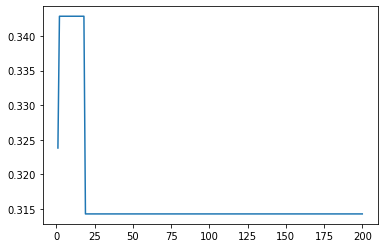

In [15]:
plt.plot(epochs, training_acc)
plt.show()

In [16]:
training_err[:5]

[0.2660993, 0.3227691, 0.2974671, 0.3320086, 0.3317195]

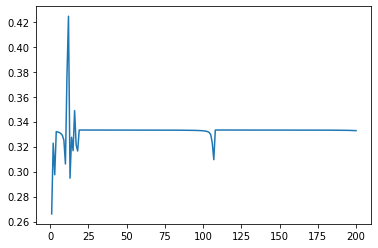

In [17]:
me = training_err
plt.plot(epochs, me)
plt.show()

### **TESTING**

In [18]:
z_in = np.dot(X_test, v)
print(z_in[:5])
print(z_in.shape)

[[ 23.16902153 177.76248582]
 [ 25.06279882 189.58584209]
 [ 18.15220501 168.89747167]
 [ 18.50687329 174.24550947]
 [ 27.30013406 202.12320035]]
(45, 2)


In [19]:
z = []
for zs in z_in:
    temp = []
    for i in zs:
        temp.append(activation(i))
    temp = np.array(temp)
    z.append(temp)

z = np.array(z)
print(z[:5])
print(z.shape)

[[1.         1.        ]
 [1.         1.        ]
 [0.99999999 1.        ]
 [0.99999999 1.        ]
 [1.         1.        ]]
(45, 2)


In [20]:
y_in = np.dot(z, w)
print(y_in[:5])
print(y_in.shape)

[[-12.57530478  -5.79875593 -14.78731508]
 [-12.57530478  -5.79875593 -14.78731508]
 [-12.57530466  -5.79875586 -14.78731496]
 [-12.57530469  -5.79875588 -14.787315  ]
 [-12.57530478  -5.79875593 -14.78731508]]
(45, 3)


In [21]:
y_hat = []
for ys in y_in:
    temp = []
    for y in ys:
        temp.append(activation(y))
    temp = np.array(temp)
    y_hat.append(temp)

y_hat = np.array(y_hat)

print(y_hat[:5])
print(y_hat.shape)

[[3.45631269e-06 3.02216242e-03 3.78399447e-07]
 [3.45631268e-06 3.02216242e-03 3.78399446e-07]
 [3.45631310e-06 3.02216263e-03 3.78399492e-07]
 [3.45631298e-06 3.02216256e-03 3.78399479e-07]
 [3.45631268e-06 3.02216242e-03 3.78399446e-07]]
(45, 3)


In [22]:
test_err = error(Y_test, y_hat)
print(test_err.mean())

0.332574445274204


In [23]:
test_acc = accuracy(Y_test, y_hat) 
print(str(round(test_acc*100, 2)) + '%')

37.78%
